In [1]:
import pandas as pd
import numpy as np

from os import sep, makedirs
from os.path import dirname, realpath, join, isdir

uppath = lambda _path, n: sep.join(_path.split(sep)[:-n]) # moves the path 'n' levels up the directory

__file__ = dirname(realpath('__file__'))
data_parent_directory = uppath(__file__, 2)
data_directory = join(data_parent_directory, 'Data')
bike_directory = join(data_directory, 'Bike')

The data is in the form of a zip file, so we extract CVSs from it.

In [2]:
from zipfile import ZipFile

def extract_bike_data(zipfile_directory, bike_directory):
    
    if not isdir(bike_directory):
        makedirs(bike_directory)
    
    bike_path = join(zipfile_directory, 'bike-sharing-demand.zip')
    with ZipFile(bike_path, 'r') as zip:
            zip.extractall(path=bike_directory)

In [3]:
def load_bike_data(bike_directory):
    train_csv = join(bike_directory, "train.csv")
    test_csv = join(bike_directory, "test.csv")
    return pd.read_csv(train_csv), pd.read_csv(test_csv)

In [4]:
extract_bike_data(data_directory, bike_directory)

train, test = load_bike_data(bike_directory)

In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


No null values. Great!

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def splitDateTime(x):
    
    dateTimeArray = x['datetime'].split()[0].split('-')
    x['day'] = int(dateTimeArray[2])
    x['month'] = int(dateTimeArray[1])
    x['year'] = int(dateTimeArray[0])
    return x

train = train.apply(lambda x: splitDateTime(x), axis=1)
test = test.apply(lambda x: splitDateTime(x), axis=1)

In [9]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,2011


In [10]:
import re

timeCount = 0
def getTimeCount(x):
    global timeCount
    time = x.split()[1]
    z = re.search("[0-9][0-9]:[0][0]:[0][0]", time)
    if(z != None):
        timeCount += 1

train.apply(lambda x: getTimeCount(x['datetime']), axis=1)
print(timeCount)

10886


In [11]:
def getTime(x):
    time = x['datetime'].split()[1].split(':')
    x['time'] = int(time[0])
    return x
    
train = train.apply(lambda x: getTime(x), axis=1)
test = test.apply(lambda x: getTime(x), axis=1)

In [12]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,2011,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2011,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,2011,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,2011,4


In [13]:
train[train['casual'] + train['registered'] != train['count']]['count'].count()

0

In [14]:
train['actualDatetime'] = train.apply(lambda x: pd.to_datetime(x['datetime']), axis=1)
test['actualDatetime'] = test.apply(lambda x: pd.to_datetime(x['datetime']), axis=1)

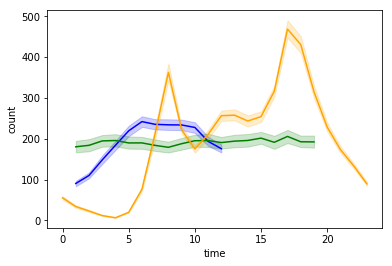

In [15]:
sns.lineplot(x='month', y='count', data=train, color='blue')
sns.lineplot(x='day', y='count', data=train, color='green')
sns.lineplot(x='time', y='count', data=train, color='orange')

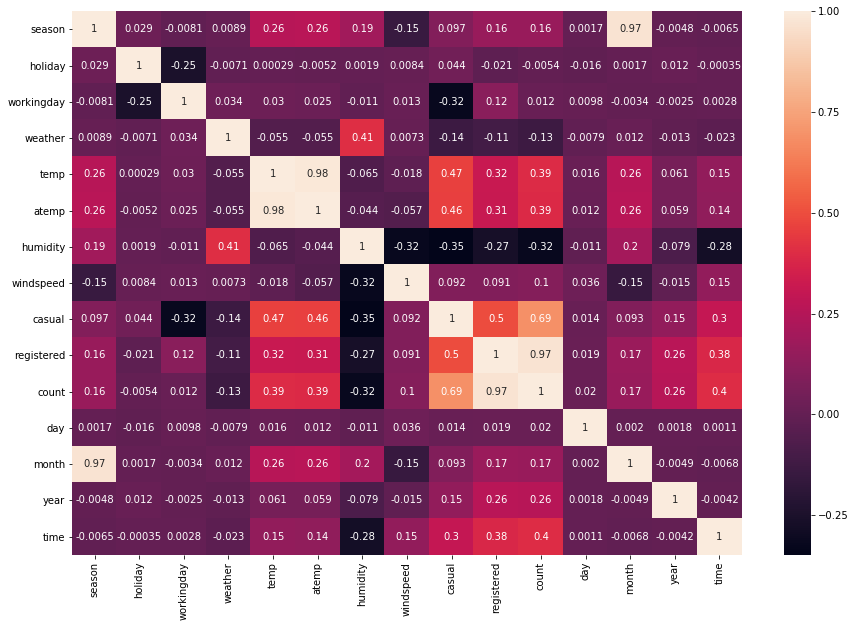

In [16]:
fig, ax = plt.subplots(figsize=(15, 10))
mask= np.zeros_like(train.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train.corr(), annot=True)

month and season are correlated. Understandable.
<br>season is just a group of columns making month more nuanced.
<br>so I'll keep month and drop season.

In [17]:
columnsToDrop = []
columnsToDrop.append('season')

---
temp and atemp are correlated. Again, understandable.
<br>I'd prefer to keep atemp, cause that's what matters to the rider.
<br>But let's visualize it and see.

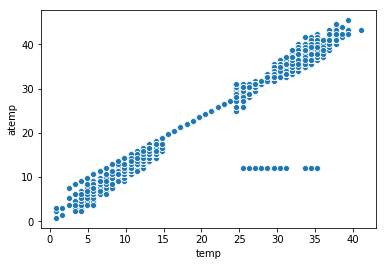

In [18]:
sns.scatterplot(x='temp', y='atemp', data=train)

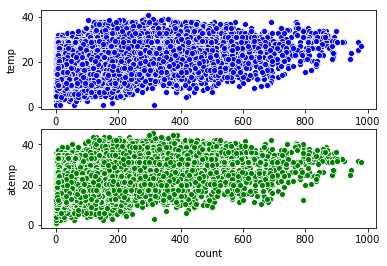

In [19]:
figure, axis = plt.subplots(2)

sns.scatterplot(x='count', y='temp', data=train, color='blue', ax=axis[0])
sns.scatterplot(x='count', y='atemp', data=train, color='green', ax=axis[1])

They seem correlated and their relationship with count looks the same, as explained by the correlation values.
<br>So I'll drop temp and keep atemp.

In [20]:
columnsToDrop.append('temp')

---
Let's check out windspeed

1313

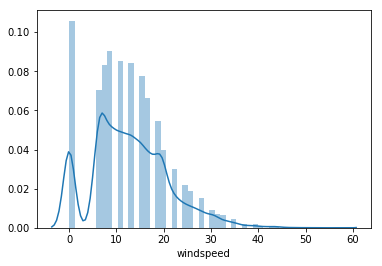

In [21]:
sns.distplot(train['windspeed'])
train[train['windspeed'] == 0]['windspeed'].count()

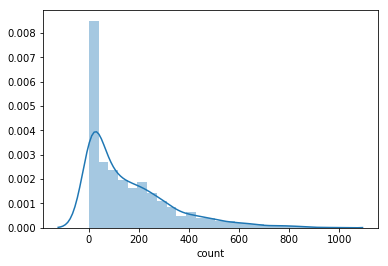

In [22]:
sns.distplot(train[train['windspeed'] == 0]['count'])

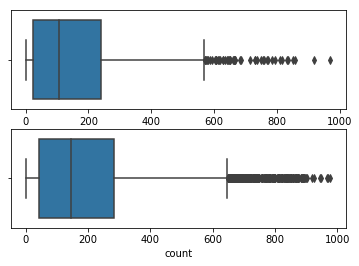

In [23]:
figure, ax = plt.subplots(2)
sns.boxplot(train[train['windspeed'] == 0]['count'], ax=ax[0])
sns.boxplot(train['count'], ax=ax[1])

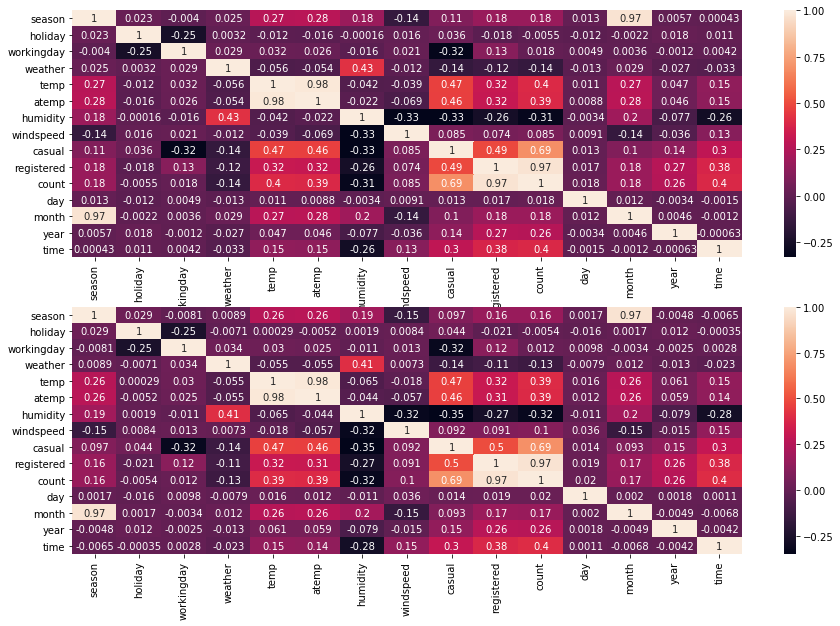

In [24]:
fig, ax = plt.subplots(2, figsize=(15, 10))

sns.heatmap(train[train['windspeed'] > 0].corr(), annot=True, ax=ax[0])
sns.heatmap(train.corr(), annot=True, ax=ax[1])

Apart from a slight shift in median, there seems to no difference between windspeed == 0 and windspeed != 0
<br>Even the correlation values are similar!
<br>I could remove records with windspeed == 0 to make the it's distribution more 'normal' (although skewed)

In [25]:
test[test['windspeed'] == 0].shape

(867, 14)

Although, there are 867 values in test data with windspeed == 0.
<br>So I'll just let them be.

---
Let's look at weather and humidity

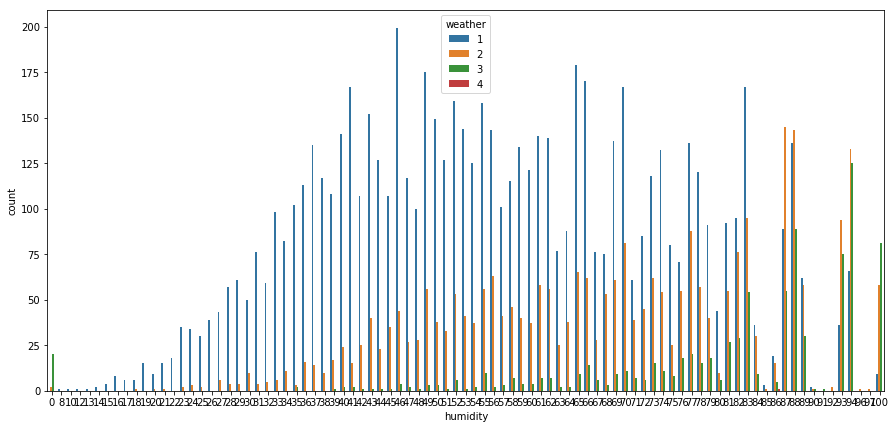

In [26]:
figure, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='humidity', hue='weather', data=train, ax=ax)

Humidity with windspeed, time, weather

In [27]:
print(train['weather'].value_counts())
test['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64


1    4221
2    1710
3     560
4       2
Name: weather, dtype: int64

In [28]:
print(train[train['weather'] == 4]['datetime'])
print()
print(test[test['weather'] == 4]['datetime'])

5631    2012-01-09 18:00:00
Name: datetime, dtype: object

154     2011-01-26 16:00:00
3248    2012-01-21 01:00:00
Name: datetime, dtype: object


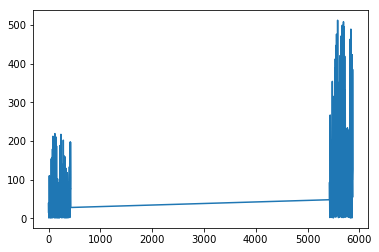

In [29]:
plt.plot(train[train['month'] == 1]['count'])

weather type = 4 has only 1 value in train data and 2 values in test data.
<br>This type is always in the month of january but it doesn't follow a pattern or constant count.
<br>So I'll just merge it with the nearest weather type = 3.

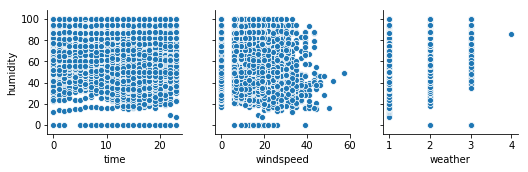

In [30]:
sns.pairplot(x_vars=['time', 'windspeed', 'weather'], y_vars=['humidity'], data=train)

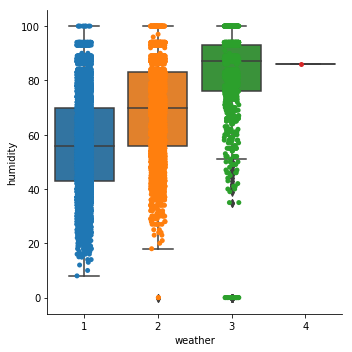

In [31]:
sns.catplot(x='weather', y='humidity', data=train)
sns.boxplot(x='weather', y='humidity', data=train)

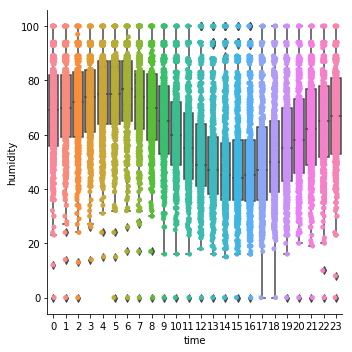

In [32]:
sns.catplot(x='time', y='humidity', data=train)
sns.boxplot(x='time', y='humidity', data=train)

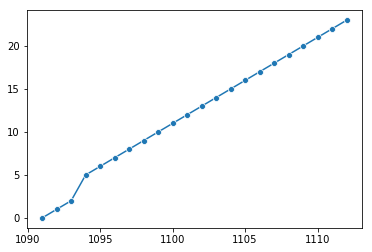

In [33]:
sns.lineplot(data=train[train['humidity'] == 0]['time'], marker='o')

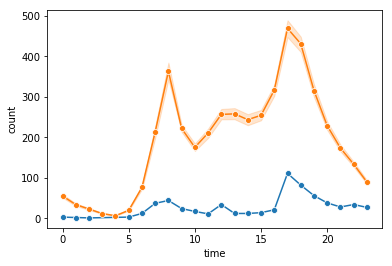

In [34]:
sns.lineplot(x='time', y='count', data=train[train['humidity'] == 0], marker='o')
sns.lineplot(x='time', y='count', data=train, marker='o')

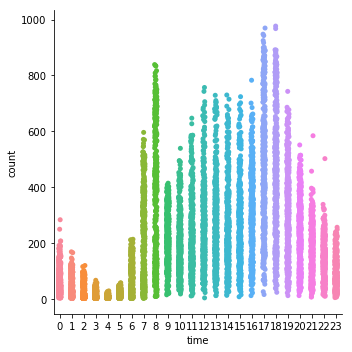

In [35]:
sns.catplot(x='time', y='count', data=train)

In [36]:
test[test['humidity'] == 0].shape

(0, 14)

Test data does't have any data with humidity == 0!

I don't see anything special about data with humidity = 0.
<br>It's weird that almost for every hour (time) there's exactly one humidity = 0 value.
<br>Nevertheless they look like outliers, so I'll leave them out.

---
Although, if they're not aberrant in terms of our target variable, here count, then they might not hurt the model.
<br>But having normal distributions could help my model, depending on which one I choose.

---
Workingday with holiday

In [37]:
print(train['workingday'].value_counts())
print(train['holiday'].value_counts())

1    7412
0    3474
Name: workingday, dtype: int64
0    10575
1      311
Name: holiday, dtype: int64


---
I'm thinking, that I'll predict casual and registered separately. I'll then add the predictions to get count.
<br>This may be more prone to error and could actually be worse.
<br>But I'll try it out.

In [38]:
trainCopy = train.drop(columns=columnsToDrop, axis=1)
testCopy = test.drop(columns=columnsToDrop, axis=1)
trainCopy.head()

,datetime,holiday,workingday,weather,atemp,humidity,windspeed,casual,registered,count,day,month,year,time,actualDatetime
0,2011-01-01 00:00:00,0,0,1,14.395,81,0.0,3,13,16,1,1,2011,0,2011-01-01 00:00:00
1,2011-01-01 01:00:00,0,0,1,13.635,80,0.0,8,32,40,1,1,2011,1,2011-01-01 01:00:00
2,2011-01-01 02:00:00,0,0,1,13.635,80,0.0,5,27,32,1,1,2011,2,2011-01-01 02:00:00
3,2011-01-01 03:00:00,0,0,1,14.395,75,0.0,3,10,13,1,1,2011,3,2011-01-01 03:00:00
4,2011-01-01 04:00:00,0,0,1,14.395,75,0.0,0,1,1,1,1,2011,4,2011-01-01 04:00:00


In [39]:
trainCopy.drop(trainCopy[trainCopy['windspeed'] == 0].index, inplace=True)
trainCopy.drop(trainCopy[trainCopy['humidity'] == 0].index, inplace=True)

In [40]:
trainCopy.replace({'weather': {4: 3}}, inplace=True)
testCopy.replace({'weather': {4: 3}}, inplace=True)

trainCopy.replace({'weather': {1: '3', 2: '2', 3: '1'}}, inplace=True)
testCopy.replace({'weather': {1: '3', 2: '2', 3: '1'}}, inplace=True)

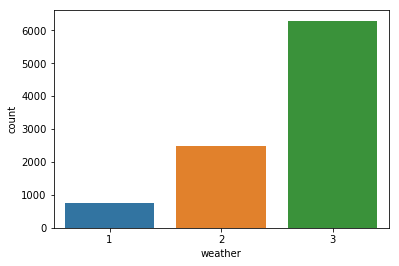

In [41]:
sns.countplot(x='weather', data=trainCopy)

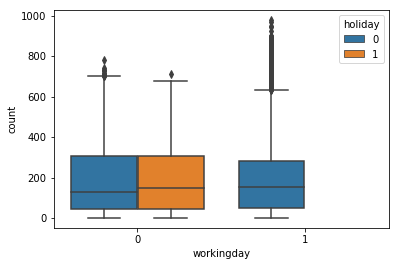

In [42]:
#sns.catplot(x='workingday', y='count', data=trainCopy)
sns.boxplot(x='workingday', y='count', data=trainCopy, hue='holiday')

In [43]:
def getDayType(x):
    
    if x['workingday'] == 1:
        return '1'
    elif x['holiday'] == 0:
        return '2'
    else:
        return '3'
    

trainCopy['dayType'] = trainCopy.apply(lambda x: getDayType(x), axis=1)
testCopy['dayType'] = testCopy.apply(lambda x: getDayType(x), axis=1)

<pre>1: Workingday 2: Holiday 3: Weekend</pre>
<br>I intend to keep them categorical, not numerical
<br>So I could've kept the names as they are, but this way I can convert them to integer easily for visualizations etc.

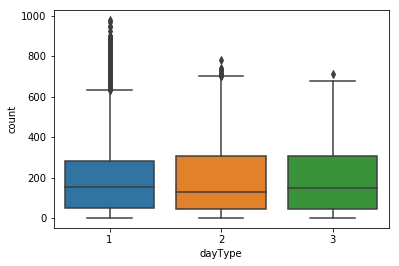

In [44]:
sns.boxplot(x='dayType', y='count', data=trainCopy)

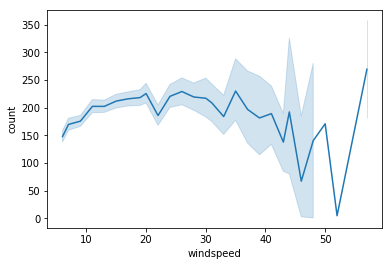

In [45]:
sns.lineplot(x='windspeed', y='count', data=trainCopy)

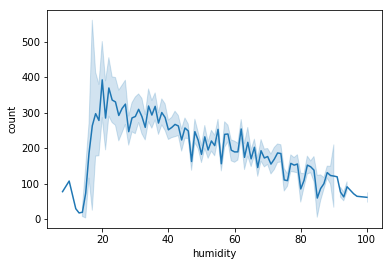

In [46]:
sns.lineplot(x='humidity', y='count', data=trainCopy)

In [47]:
# def getHumidityCategory(x):
#     if x < 20:
#         return '1'
#     elif x >= 20 and x < 40:
#         return '2'
#     elif x >= 40 and x < 60:
#         return '3'
#     elif x >= 60 and x < 80:
#         return '4'
#     else:
#         return '5'


# trainCopy['humidity'] = trainCopy.apply(lambda x: getHumidityCategory(x['humidity']), axis=1)
# testCopy['humidity'] = testCopy.apply(lambda x: getHumidityCategory(x['humidity']), axis=1)

In [48]:
# def getWindspeedCategory(x):
#     if x < 10:
#         return '1'
#     elif x >= 10 and x < 20:
#         return '2'
#     elif x >= 20 and x < 30:
#         return '3'
#     elif x >= 30 and x < 40:
#         return '4'
#     else:
#         return '5'


# trainCopy['windspeed'] = trainCopy.apply(lambda x: getWindspeedCategory(x['windspeed']), axis=1)
# testCopy['windspeed'] = testCopy.apply(lambda x: getWindspeedCategory(x['windspeed']), axis=1)

I'm leaving out Windspeed, that makes Humidity better as they are correlated.
<br>So it is better not to convert them into ordinal ranges and leave it as it is.

In [49]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import QuantileTransformer
# from sklearn.decomposition import PCA

# quantileTransformer = QuantileTransformer(output_distribution='normal')
# condensePipeline = make_pipeline(quantileTransformer, PCA(n_components=1))

# trainCopy['humidity_windspeed'] = condensePipeline.fit_transform(trainCopy[['humidity', 'windspeed']])
# testCopy['humidity_windspeed'] = condensePipeline.fit_transform(testCopy[['humidity', 'windspeed']])

Even using PCA to condense them into a single feature didn't help.
So I'll just stick to the previous plan of leaving windspeed out.

---
Alright, the new data's distributions look good.
Let's go ahead and  fit a model. And scale if necessary.

In [50]:
trainCopy.head()

,datetime,holiday,workingday,weather,atemp,humidity,windspeed,casual,registered,count,day,month,year,time,actualDatetime,dayType
5,2011-01-01 05:00:00,0,0,2,12.880,75,6.0032,0,1,1,1,1,2011,5,2011-01-01 05:00:00,2
10,2011-01-01 10:00:00,0,0,3,19.695,76,16.9979,12,24,36,1,1,2011,10,2011-01-01 10:00:00,2
11,2011-01-01 11:00:00,0,0,3,16.665,81,19.0012,26,30,56,1,1,2011,11,2011-01-01 11:00:00,2
12,2011-01-01 12:00:00,0,0,3,21.210,77,19.0012,29,55,84,1,1,2011,12,2011-01-01 12:00:00,2
13,2011-01-01 13:00:00,0,0,2,22.725,72,19.9995,47,47,94,1,1,2011,13,2011-01-01 13:00:00,2


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

trainCopy['day'] = trainCopy['day'].astype(str)
trainCopy['month'] = trainCopy['month'].astype(str)
trainCopy['year'] = trainCopy['year'].astype(str)
trainCopy['weather'] = trainCopy['weather'].astype(int)

trainCopy = pd.get_dummies(trainCopy, prefix={'weather': 'weather'}, columns=['weather'])

In [52]:
trainCopy.head()

,datetime,holiday,workingday,atemp,humidity,windspeed,casual,registered,count,day,month,year,time,actualDatetime,dayType,weather_1,weather_2,weather_3
5,2011-01-01 05:00:00,0,0,12.880,75,6.0032,0,1,1,1,1,2011,5,2011-01-01 05:00:00,2,0,1,0
10,2011-01-01 10:00:00,0,0,19.695,76,16.9979,12,24,36,1,1,2011,10,2011-01-01 10:00:00,2,0,0,1
11,2011-01-01 11:00:00,0,0,16.665,81,19.0012,26,30,56,1,1,2011,11,2011-01-01 11:00:00,2,0,0,1
12,2011-01-01 12:00:00,0,0,21.210,77,19.0012,29,55,84,1,1,2011,12,2011-01-01 12:00:00,2,0,0,1
13,2011-01-01 13:00:00,0,0,22.725,72,19.9995,47,47,94,1,1,2011,13,2011-01-01 13:00:00,2,0,1,0


In [69]:
testCopy['day'] = testCopy['day'].astype(str)
testCopy['month'] = testCopy['month'].astype(str)
testCopy['year'] = testCopy['year'].astype(str)
testCopy['weather'] = testCopy['weather'].astype(int)

testCopy = pd.get_dummies(testCopy, prefix={'weather': 'weather'}, columns=['weather'])

testPredictors = testCopy.columns.drop(['datetime', 'actualDatetime', 'day', 'workingday', 'holiday', 'windspeed'])

In [71]:
predictorColumns = trainCopy.columns.drop(['datetime', 'actualDatetime', 'day', 'workingday', 'holiday', 'windspeed', 'casual', 'registered', 'count'])
targetColumns = ['casual', 'registered', 'count']

predictorTrain, predictorTest, targetTrain, targetTest = train_test_split(trainCopy[predictorColumns], 
                                                                          trainCopy[targetColumns], test_size=0.33, random_state=42)

In [72]:
from sklearn.ensemble import RandomForestRegressor

casualRfr = RandomForestRegressor(n_estimators=100)

casualRfr.fit(predictorTrain, targetTrain['casual'])
casualRfr.score(predictorTest, targetTest['casual'])

0.9001697627490481

In [73]:
from sklearn.ensemble import ExtraTreesRegressor

registeredRfr = RandomForestRegressor(n_estimators=100)

registeredRfr.fit(predictorTrain, targetTrain['registered'])
registeredRfr.score(predictorTest, targetTest['registered'])

0.9393826047172952

In [74]:
from sklearn.metrics import r2_score

casualPredictions = casualRfr.predict(predictorTest)
registeredPredictions = registeredRfr.predict(predictorTest)

predictions = np.int_(np.round(casualPredictions + registeredPredictions))

print(r2_score(targetTest['count'], predictions))

0.9417123670617035


In [75]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error( targetTest['count'], predictions ))

0.3285638983321971

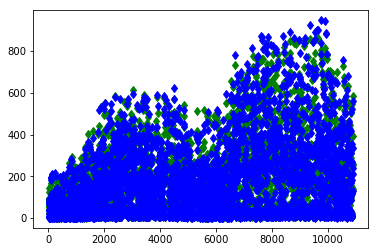

In [76]:
predictions_data = {'target': targetTest['count'], 'predictions': predictions}
predictions_df = pd.DataFrame(data=predictions_data)

plt.plot(predictions_df['predictions'], 'gd')
plt.plot(predictions_df['target'], 'bd')

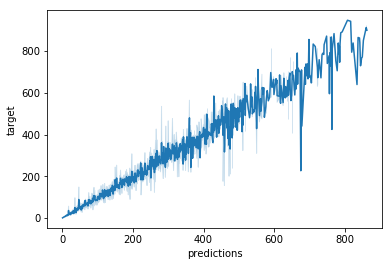

In [77]:
sns.lineplot(x='predictions', y='target', data=predictions_df)

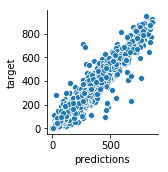

In [78]:
sns.pairplot(x_vars=['predictions'], y_vars=['target'], data=predictions_df, diag_kind='kde')

In [79]:
casualRfr = RandomForestRegressor(n_estimators=100)
registeredRfr = RandomForestRegressor(n_estimators=100)

casualRfr.fit(trainCopy[predictorColumns], trainCopy['casual'])
registeredRfr.fit(trainCopy[predictorColumns], trainCopy['registered'])

casualPredictions = casualRfr.predict(testCopy[testPredictors])
registeredPredictions = registeredRfr.predict(testCopy[testPredictors])

predictions = np.int_(np.round(casualPredictions + registeredPredictions))

submission_data = {'datetime': test['datetime'], 'count': predictions}
submission = pd.DataFrame(data=submission_data)

submission.to_csv(path_or_buf=join(bike_directory, "submission.csv"), index=False)

In [80]:
casualRfr.feature_importances_

array([0.29934384, 0.07103649, 0.0402975 , 0.03906522, 0.35218649,
       0.18632028, 0.00277283, 0.00257519, 0.00640215])

In [81]:
registeredRfr.feature_importances_

array([0.0503582 , 0.03397456, 0.07464697, 0.09206597, 0.57654635,
       0.15604181, 0.01284805, 0.00129089, 0.00222721])

In [82]:
predictorColumns

Index(['atemp', 'humidity', 'month', 'year', 'time', 'dayType', 'weather_1',
       'weather_2', 'weather_3'],
      dtype='object')

Looking at the Target vs Predictions plot few cells earlier, some values clearly deviate away from the y=x line.
<br>As a later exercise, I could try narrowing these down, keeping in mind that I don't overfit them.